<a href="https://colab.research.google.com/github/AnacletoLAB/grape/blob/main/tutorials/BM25_weighted_pretrained_BERT_based_textual_embedding_using_GRAPE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BM25-weighted pretrained BERT-based textual embedding using 🍇🍇 GRAPE 🍇🍇
Welcome to this tutorial on using the BM25-weighted embedding utility from [GRAPE](https://github.com/AnacletoLAB/grape). In this tutorial, we will introduce a simple utility that allows you to compute BM25-weighted embeddings for text data stored in a TSV or CSV file, starting from any pretrained BERT-based embedding available from the [Hugging Face model hub](https://huggingface.co/models).

This utility is particularly useful for situations where you have a dataset with associated textual descriptions, such as the node descriptions in a graph, and you want to a good and fast embedding for these descriptions. The utility can be used **with just a single line of code**, making it trivial to incorporate into your workflow. It also handles the process of downloading the required BERT-based model from the [Hugging Face hub](https://huggingface.co/models), so you don't have to worry about that aspect of the process.

We will begin by introducing the concepts of [BM25](https://en.wikipedia.org/wiki/Okapi_BM25) and [BERT-based embeddings](https://en.wikipedia.org/wiki/BERT_(language_model)), and then we will walk through an example of how to use the utility to compute BM25-weighted embeddings for a simple dataset, the [Human Phenotype Ontology](https://hpo.jax.org/).

[Don't forget to ⭐ GRAPE!](https://github.com/AnacletoLAB/grape)

## What is TFIDF?
[TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf), or **term frequency-inverse document frequency**, is a statistical measure used to evaluate the importance of a word in a document or a collection of documents. It is often used in information retrieval and natural language processing tasks, such as text classification and information extraction.

TF-IDF assigns a weight to each word in a document based on its frequency in the document and the inverse document frequency of the term in a collection of documents. The intuition behind this measure is that words that occur frequently in a document are likely to be important to the meaning of the document, but words that occur frequently in many documents are likely to be less important.

The formula for calculating the TF-IDF weight of a term $t$ in a document $d$ in a collection of documents $D$ is:

$$\text{TFIDF}(t, d, D) = \text{TF}(t, d) * \text{IDF}(t, D)$$

where:

* $TF(t, d)$ is the **term frequency** of term $t$ in the document $d$, which is the number of times that term $t$ occurs in document $d$ divided by the total number of words in the document $d$.
* $IDF(t, D)$ is the **inverse document frequency** of the term $t$ in the documents collection $D$, which is calculated as the logarithm of the total number of documents in $D$ divided by the number of documents in $D$ that contain $t$.

TF-IDF is often used as a weighting factor in information retrieval and text mining systems, as it can help to identify the most important terms in a document or a collection of documents. It is also useful for identifying the key terms that distinguish one document from another, as well as for reducing the impact of common words (such as "the" and "a") that occur frequently but are not necessarily meaningful.

### What is BM25?
[BM25](https://en.wikipedia.org/wiki/Okapi_BM25) (Best Match 25) is a ranking function used in information retrieval to score and rank the relevance of documents to a given query. It is a variation of the TF-IDF measure, with some additional parameters and modifications.

Like TF-IDF, BM25 takes into account the term frequency of a word in a document, as well as the inverse document frequency of the term in a collection of documents. However, BM25 introduces some additional parameters that allow for more fine-tuning of the ranking function. These include parameters for the average length of documents in the collection, the length of the current document, and the length of the query.

The formula for BM25 is:

$$\text{BM25}(d, Q) = \sum_{q \in Q} \ln\left(1 + \frac{\lvert D \rvert - n_q + 0.5}{n_q + 0.5}\right) \cdot \frac{f(q, d) \cdot (k_1 + 1)}{f(q, d) + k_1 \cdot \left(1 - b + b \frac{\lvert d \rvert}{\textit{avgdl}} \right)}$$

where:

* $d$ is the current document being scored
* $Q$ is the query
* $n_q$ is the number of documents where $q$ appears in.
* $f(q, d)$ is the number of times $q$ appears in the document $d$
* $k_1$ is a parameter that controls the importance of term frequency
* $b$ is a parameter that controls the importance of document length
* $\lvert D \rvert$ is the number of documents in the collection
* $\lvert d \rvert$ is the length of the current document
* `avgdl` is the average length of documents in the collection

BM25 is widely used in information retrieval systems and has been shown to perform well in many different types of tasks. It is often used as the ranking function in search engines and other information retrieval systems, as it can effectively score and rank documents based on their relevance to a given query.


## What is BERT?
[BERT](https://en.wikipedia.org/wiki/BERT_(language_model)) (Bidirectional Encoder Representations from Transformers) is a transformer-based language model developed by Google that has achieved state-of-the-art performance on a wide range of natural language processing tasks. BERT is trained on a large dataset of text and uses a transformer architecture, which allows it to process input in a bidirectional manner (considering both the left and right context of each word) and to handle longer input sequences than previous models.

There are many derivative models of BERT, including [ALBERT](https://arxiv.org/pdf/1909.11942.pdf), [RoBERTa](https://arxiv.org/pdf/1907.11692.pdf), and [DistilBERT](https://arxiv.org/pdf/1910.01108.pdf), which have been developed to improve the performance and efficiency of the original BERT model. These models typically involve modifications to the original BERT architecture or training procedure, such as using fewer layers or parameters, or using a different type of self-attention mechanism.

<img src="https://www.codemotion.com/magazine/wp-content/uploads/2020/05/bert-google-1200x675.png" width=500 />

### What is the hugging face model hub?
[Hugging Face](https://huggingface.co/) is a company that offers a library of pre-trained language models, including BERT and its derivatives, that can be used for a variety of natural language processing tasks.

<img src="https://repository-images.githubusercontent.com/323591830/9ba12f80-ca92-11eb-9da7-8bf28c3bacaf" width=600 />

### What is a BERT tokenizer?
[A BERT Tokenizer](https://huggingface.co/docs/transformers/main_classes/tokenizer) is a tool for preprocessing text data for use with the BERT language model. It is responsible for splitting the input text into subwords or tokens that can be processed by the BERT model.

The BERT tokenizer is based on the WordPiece tokenization algorithm, which was developed specifically for the BERT model. It works by dividing the input text into subwords based on a predefined vocabulary. The vocabulary consists of the most frequent words in the training dataset, as well as a set of subword units that are constructed by decomposing more infrequent words into their component parts.

To use the BERT tokenizer, you first need to specify the vocabulary to use. You can either use a predefined vocabulary that is provided with the BERT model, or you can create your own vocabulary by training the BERT tokenizer on your own dataset. Once you have a vocabulary, you can use the BERT tokenizer to split the input text into tokens by calling the tokenize method.

The BERT tokenizer also has the ability to handle special tokens, such as the `[CLS]` and `[SEP]` tokens, which are used to indicate the beginning and end of a document or a sentence within a document. It also has support for tokenizing and encoding special characters, such as emoji, and can handle out-of-vocabulary words by subdividing them into subword units.

### What is SciBERT?
[SciBERT](https://arxiv.org/pdf/1903.10676.pdf) is a variant of the BERT (Bidirectional Encoder Representations from Transformers) language model that has been pre-trained on a large dataset of scientific texts. It is specifically designed to improve the performance of natural language processing tasks in the scientific domain.

SciBERT is trained on a dataset consisting of scientific articles from a range of domains, including biology, chemistry, physics, and computer science.

SciBERT is designed to be used as a pre-trained model for a variety of natural language processing tasks in the scientific domain, such as scientific summarization, question answering, and information extraction. It has been shown to outperform other pre-trained models on a number of benchmarks and is widely used in scientific research.

Like other BERT models, SciBERT can be fine-tuned on specific tasks by adding task-specific layers on top of the pre-trained model and training the combined model on a labeled dataset. Fine-tuning allows the model to learn task-specific information and improve its performance on the target task.

<img src="https://github.com/AnacletoLAB/grape/blob/main/images/eistein_scibert.jpg?raw=true" width=300 />

### What is Specter?
Similarly to SciBERT, [SPECTER](https://arxiv.org/pdf/2004.07180.pdf) is a pre-trained language model to generate document-level embedding of documents. It is pre-trained on a powerful signal of document-level relatedness: the citation graph. Unlike existing pretrained language models, SPECTER can be easily applied to downstream applications without task-specific fine-tuning.

## What is a BM25-weighted BERT embedding?
A BM25-weighted BERT embedding for texts is a method for representing a piece of text as a numerical vector, or embedding, that takes into account the importance of individual words within the text. This embedding is computed by first splitting the text into tokens using a BERT tokenizer, retrieving the embedding associated with each token, and then averaging the embeddings using BM25 weights.

By using BM25 weights to average the token embeddings, the resulting BM25-weighted BERT embedding will over-weight the embeddings of the most relevant terms and under-weight the embeddings of the less relevant terms. This can be useful for tasks such as text classification where the importance of individual words or phrases can vary significantly.

## What is half-precision?
[Float16, also known as half precision floating point](https://en.wikipedia.org/wiki/Half-precision_floating-point_format), is a numerical data type used to represent decimal values in computers. It is a lower precision version of the more commonly used [float32](https://en.wikipedia.org/wiki/Single-precision_floating-point_format) and [float64](https://en.wikipedia.org/wiki/Double-precision_floating-point_format) data types, with 16 bits of precision compared to 32 bits and 64 bits, respectively.

Float16 is typically used when a lower precision representation of decimal values is sufficient and the use of higher precision data types is not necessary. It is often used to reduce the amount of memory required to store data, as float16 requires half as much space as float32 and one quarter as much space as float64.

Despite its lower precision, float16 can still represent a wide range of decimal values and is often used in applications where the loss of precision is acceptable. It is particularly well-suited for use in graphics and image processing, where the use of higher precision data types may not be necessary.

Overall, float16 is a compact and efficient numerical data type that is well-suited for situations where a lower precision representation of decimal values is sufficient.


## What is GRAPE?
[🍇🍇 GRAPE 🍇🍇](https://github.com/AnacletoLAB/grape) is a graph processing and embedding library that enables users to easily manipulate and analyze graphs. With [GRAPE](https://github.com/AnacletoLAB/grape), users can efficiently load and preprocess graphs, generate random walks, and apply various node and edge embedding models. Additionally, [GRAPE](https://github.com/AnacletoLAB/grape) provides a fair and reproducible evaluation pipeline for comparing different graph embedding and graph-based prediction methods.

![GRAPE](https://github.com/AnacletoLAB/grape/raw/main/images/sequence_diagram.png?raw=true)

[Don't forget to ⭐ GRAPE!](https://github.com/AnacletoLAB/grape)

## Installing GRAPE
We begin by installing GRAPE. Since GRAPE is available from PyPI, this is a breeze! You can simply run:

In [1]:
!pip install transformers grape -qU

If you are running this on colab, it is quite likely you will need to update matplotlib. The default version is an old one that is broken, for some reason.

In [ ]:
!pip install matplotlib -qU

We will also be using the tree utility, which we can install as follows:

In [2]:
!apt-get install tree

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tree is already the newest version (1.7.0-5).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.


## The magical one-liner
Now, as mentioned before, the whole thing described is a one-liner. You can simply import it from GRAPE as follows:

In [3]:
from grape.datasets import get_okapi_tfidf_weighted_textual_embedding

Now that we have the utility, we need something to test it on! A common use case for this utility is to compute BM25-weighted embeddings for the node descriptions of a graph, but it is important to note that this utility can be used with any set of documents and **is not limited to graph-related data**. In other words, you can use this utility to compute BM25-weighted embeddings for any dataset that includes associated textual descriptions, regardless of whether the data is in the form of a graph or not.

In the following cell of this Jupyter Notebook, I will import the [Human Phenotype Ontology (HPO)](https://hpo.jax.org/), which is a standardized vocabulary of phenotypic abnormalities encountered in human disease. I will use the HPO to retrieve its TSV node list and related node descriptions, which I will then display briefly using pandas to show that it is simply a TSV file with no unusual data format. It is important to note that this utility can be used with any TSV/CSV file.

We will not be using the graph, except to visualize that the resulting embedding are meaningful.





In [4]:
from grape.datasets.kgobo import HP

hpo = HP(version="2022-10-05")

Let's see how the downloads folder is structured:

In [5]:
! tree graphs

graphs
└── kgobo
    └── HP
        └── 2022-10-05
            ├── hp_kgx_tsv
            │   ├── hp_kgx_tsv_edges.tsv
            │   └── hp_kgx_tsv_nodes.tsv
            ├── hp_kgx_tsv.tar.gz
            └── preprocessed
                └── undirected
                    └── 2e53d3da20f3329c25889930d77bb6c5a9c32e63589505a745b8bcb06cab17ab
                        ├── edges.tsv
                        ├── edge_types.tsv
                        ├── metadata.json
                        ├── nodes.tsv
                        └── node_types.tsv

7 directories, 8 files


Now, we want the `graphs/kgobo/HP/2022-10-05/hp_kgx_tsv/hp_kgx_tsv_nodes.tsv` file. We can display it with pandas:

In [6]:
path = "graphs/kgobo/HP/2022-10-05/hp_kgx_tsv/hp_kgx_tsv_nodes.tsv"

In [7]:
import pandas as pd

pd.read_csv(path, sep="\t", nrows=5)

,id,category,name,description,xref,provided_by,synonym,iri,same_as,subsets
0,HP:0011770,biolink:PhenotypicFeature,Tertiary hyperparathyroidism,A type of hyperparathyroidism that occurs foll...,SNOMEDCT_US:78200003|UMLS:C0271858,hp.json,NaN,http://purl.obolibrary.org/obo/HP_0011770,NaN,NaN
1,HP:0011771,biolink:PhenotypicFeature,Autoimmune hypoparathyroidism,A type of hypoparathyroidism with circulating ...,UMLS:C0271865|SNOMEDCT_US:75316000,hp.json,NaN,http://purl.obolibrary.org/obo/HP_0011771,NaN,NaN
2,HP:0011772,biolink:PhenotypicFeature,Abnormal thyroid morphology,A structural abnormality of the thyroid gland.,UMLS:C4023195,hp.json,Abnormal shape of thyroid gland|Abnormality of...,http://purl.obolibrary.org/obo/HP_0011772,NaN,NaN
3,UBERON:0011591,biolink:AnatomicalEntity,tract of diencephalon,An axon tract that is part of a diencephalon.,FMA:62447,hp.json,diencephalon tract,http://purl.obolibrary.org/obo/UBERON_0011591,NaN,NaN
4,HP:0011773,biolink:PhenotypicFeature,Uninodular goiter,Enlargement of the thyroid gland related to a ...,UMLS:C0342205|SNOMEDCT_US:237569006,hp.json,Uninodular goitre,http://purl.obolibrary.org/obo/HP_0011773,NaN,NaN


Now, we can use the one-liner we imported before as follows:

In [8]:
embedding = get_okapi_tfidf_weighted_textual_embedding(
    path,
    separator="\t",
    header=True,
    # The k1 and b are BM25 parameters.
    # They may be tuned using a number of hyper-parameter optimization techniques.
    k1 = 1.5,
    b = 0.75,
    columns=["name", "description", "synonym"],
    # Just set here any BERT-based model from huggingface.
    pretrained_model_name_or_path="allenai/scibert_scivocab_uncased"
)

One important aspect of the BM25-weighted BERT embedding is that it is stored in float16 format, which is a compact numerical format that allows for efficient storage and computation. This is particularly important when working with large datasets, as float16 can help to reduce the amount of memory required to store the embeddings.

The obtained embedding are a numpy array with data type float 16, i.e. half-precision:

In [9]:
embedding

array([[-9.7942e-04, -1.1425e-03,  3.5858e-04, ..., -1.9932e-03,
        -2.5787e-03, -1.6279e-03],
       [-2.9182e-03, -2.2469e-03,  4.5853e-03, ..., -1.1887e-02,
        -6.9504e-03, -8.4610e-03],
       [-5.4131e-03,  1.0849e-02,  1.3565e-02, ..., -8.5754e-03,
         9.1782e-03,  1.4343e-02],
       ...,
       [-6.4993e-04, -1.6108e-03, -5.1880e-03, ...,  2.9125e-03,
        -3.6955e-06, -7.6532e-04],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
         0.0000e+00,  0.0000e+00],
       [ 0.0000e+00,  0.0000e+00,  0.0000e+00, ...,  0.0000e+00,
         0.0000e+00,  0.0000e+00]], dtype=float16)

To quickly evaluate whether there is any signal in the embedding we have obtained, we can compute a TSNE visualization.

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 19995 samples in 0.003s...
[t-SNE] Computed neighbors for 19995 samples in 24.649s...
[t-SNE] Computed conditional probabilities for sample 1000 / 19995
[t-SNE] Computed conditional probabilities for sample 2000 / 19995
[t-SNE] Computed conditional probabilities for sample 3000 / 19995
[t-SNE] Computed conditional probabilities for sample 4000 / 19995
[t-SNE] Computed conditional probabilities for sample 5000 / 19995
[t-SNE] Computed conditional probabilities for sample 6000 / 19995
[t-SNE] Computed conditional probabilities for sample 7000 / 19995
[t-SNE] Computed conditional probabilities for sample 8000 / 19995
[t-SNE] Computed conditional probabilities for sample 9000 / 19995
[t-SNE] Computed conditional probabilities for sample 10000 / 19995
[t-SNE] Computed conditional probabilities for sample 11000 / 19995
[t-SNE] Computed conditional probabilities for sample 12000 / 19995
[t-SNE] Computed conditional probabilities for sa

(<Figure size 1400x1400 with 1 Axes>,
 <AxesSubplot: title={'center': 'Node types HP TFIDF weighted BERT'}>,
 "<i>Node types</i>: 'PhenotypicFeature' in blue, 'AnatomicalEntity' in orange, 'BiologicalProcess' in red, 'NamedThing' in cyan, 'ChemicalSubstance' in green, 'Cell' in yellow, 'Protein' in purple, and Other 5 node types in pink. The node types hp tfidf weighted bert do not appear to form recognizable clusters (Balanced accuracy: 32.17% ± 0.66%) The separability consideration  derive from evaluating a Decision Tree trained on five Monte Carlo holdouts, with a 70/30 split between training and test sets..")

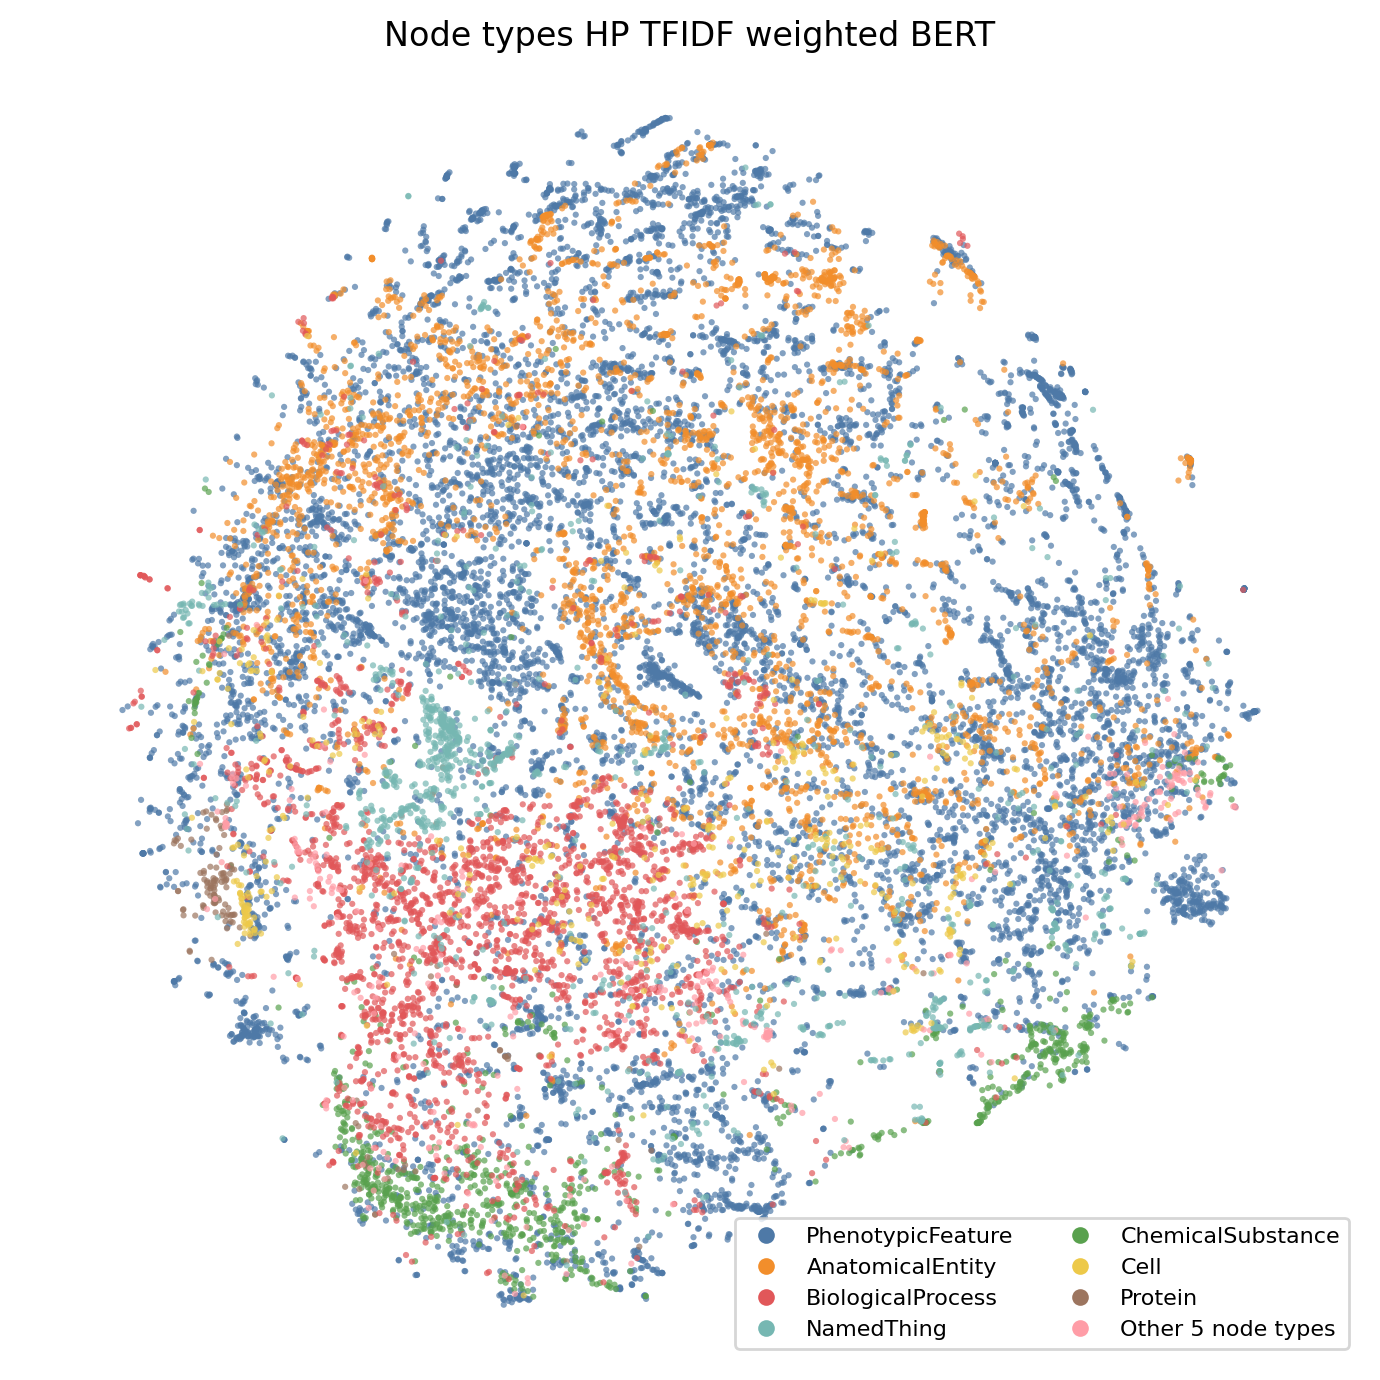

In [11]:
from grape import GraphVisualizer

vis = GraphVisualizer(
    hpo,
    decomposition_kwargs=dict(metric="cosine"),
    verbose=True,
)
vis.fit_nodes(embedding)
vis.plot_node_types()

## Conclusions
In this tutorial, we introduced a simple utility from the GRAPE library for computing BM25-weighted BERT embeddings for texts. We discussed the concepts of BM25 and BERT-based embeddings and demonstrated how to use the utility to compute BM25-weighted embeddings for a simple dataset.

We also highlighted the versatility of this utility, as it can be used with any set of documents and is not limited to data in the form of a graph. 

Overall, the BM25-weighted BERT embedding provides a compact and informative representation of a piece of text that takes into account the relative importance of the different terms within the text. It is stored in float16 format, which allows for efficient storage and computation, and can be used to improve the performance of natural language processing tasks in a variety of different contexts.

[Don't forget to ⭐ GRAPE!](https://github.com/AnacletoLAB/grape)